# 순환 신경망 - 나비야
- 출처: 순환 신경망 모델 만들어보기



### 상태 유지 LSTM 모델
- 상태 유지 모드에서는 현재 샘플의 학습 상태가 다음 샘플의 초기

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

(50, 5)


In [6]:
X_train = dataset[:, :-1]
y_train = dataset[:, -1]

MAX_IDX_VALUE = 13

In [7]:
X_train = X_train / float(MAX_IDX_VALUE)
X_train = np.reshape(X_train, (50, 4, 1))
Y_train = to_categorical(y_train)
one_hot_vec_size = Y_train.shape[1]
one_hot_vec_size

12

In [8]:
# 손실 이력 클래스 정의
class LossHistory(Callback):
  def init(self):
    self.losses = []

  def on_epoch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))

### 모델 정의/설정/학습/평가

In [9]:
model = Sequential([
                    LSTM(128, batch_input_shape=(1, 4, 1), stateful=True),
                    Dense(one_hot_vec_size, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 128)                  66560     
_________________________________________________________________
dense (Dense)                (1, 12)                   1548      
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
num_epochs = 2000
history = LossHistory()
history.init()
for epoch_idx in range(num_epochs):
  print('epochs: ' + str(epoch_idx))
  model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history])
  model.reset_states()

epochs: 0
50/50 - 2s - loss: 2.3356 - accuracy: 0.3000
epochs: 1
50/50 - 0s - loss: 1.9998 - accuracy: 0.3400
epochs: 2
50/50 - 0s - loss: 1.9571 - accuracy: 0.3400
epochs: 3
50/50 - 0s - loss: 1.9417 - accuracy: 0.3400
epochs: 4
50/50 - 0s - loss: 1.9324 - accuracy: 0.3400
epochs: 5
50/50 - 0s - loss: 1.9256 - accuracy: 0.3400
epochs: 6
50/50 - 0s - loss: 1.9202 - accuracy: 0.3400
epochs: 7
50/50 - 0s - loss: 1.9157 - accuracy: 0.3400
epochs: 8
50/50 - 0s - loss: 1.9118 - accuracy: 0.3400
epochs: 9
50/50 - 0s - loss: 1.9081 - accuracy: 0.3400
epochs: 10
50/50 - 0s - loss: 1.9045 - accuracy: 0.3600
epochs: 11
50/50 - 0s - loss: 1.9008 - accuracy: 0.3600
epochs: 12
50/50 - 0s - loss: 1.8967 - accuracy: 0.3600
epochs: 13
50/50 - 0s - loss: 1.8924 - accuracy: 0.3600
epochs: 14
50/50 - 0s - loss: 1.8884 - accuracy: 0.3600
epochs: 15
50/50 - 0s - loss: 1.8776 - accuracy: 0.3800
epochs: 16
50/50 - 0s - loss: 2.0541 - accuracy: 0.3600
epochs: 17
50/50 - 0s - loss: 1.9016 - accuracy: 0.3600
ep

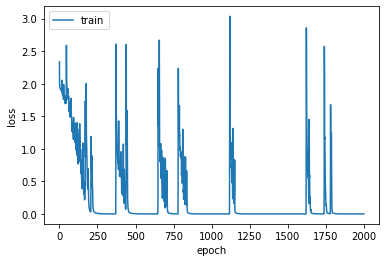

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(X_train, Y_train, batch_size=1)
print('%s: %.2f%%' %(model.metrics_names[1], score[1]*100))

50/50 [==============================] - 1s 1ms/step - loss: 1.3428e-05 - accuracy: 1.0000
accuracy: 100.00%


In [15]:
pred_count = 50

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(X_train, batch_size=1)

for i in range(pred_count):
  idx = np.argmax(pred_out[i])
  seq_out.append(idx2code[idx])

model.reset_states()
print('one step prediction: ', seq_out)

one step prediction:  ['g8', 'e8', 'e4', 'f8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e4', 'f8', 'f8', 'g4', 'g8', 'c8', 'e8', 'd8', 'g8', 'd8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'f8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [16]:
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타임스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

model.reset_states()
print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
